# Parallelization with Python:

## Demo for basic multiprocessing.

### Github:

<div>
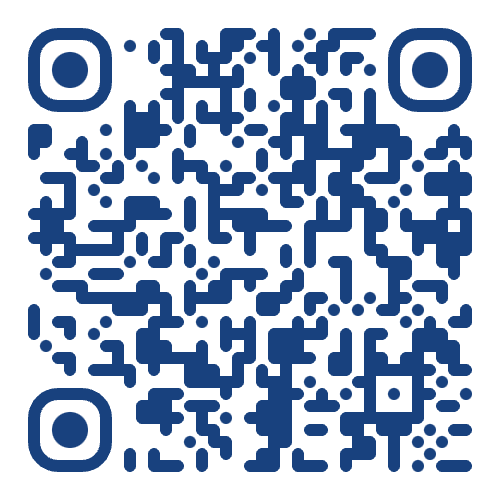
</div>

### Online resources:

- https://sydney-informatics-hub.github.io/training.artemis.python/04-multiproc_mpi/index.html
- https://superfastpython.com/multiprocessing-pool-python/
- https://www.youtube.com/watch?v=fKl2JW_qrso
- https://www.youtube.com/watch?v=X7vBbelRXn0

### Hungjui Yu – 20240223

***
## Few things before we start ...

### This is highly based on personal expericence and learning.

- #### You may find it useful if ...

    - You are working with Python but bumped with some computational challenges dealing with huge dataset.

    - You don't know much about parallelization but curious about how you can optimize or speed-up your wrok flow.

    - You simply love coding and just want to chat (aka me).

- #### You may NOT find it useful if ...

    - You are not working with Python.
    
    - Your work is pretty fast already.

    - You already know how to optimize your workflow with multiple parallelization methods. 

### Eitherway, <font color='hotpink'>*WELCOME!*</font>

### and feel happy about sitting here because ...

```
(conversations with NCAR ITs)

... At this time we do not have an example for Python muliprocessing, though I am sure we eventually will have such. Not many users are using that package.  In all of our 20,000+ tickets I count only three such users, including you. ...

... I don't have a better recommendation for parallelizing python work flows on Derecho. Between the three options of conda multiprocessing, OpenMP, or MPI, I'd use the one that best fits your needs. More people will be using these conda parallelization tools in the future. There will be more tickets and overall familiarity with them in the near future.  You should feel very good about the fact that you are in the vanguard of using conda multiprocessing. ...
```



***
## Before apply *ANY* multiprocessing ...

### 1. Recognize your question first!

- Identify your goal of the process.

- Strategize the parallelization.

- Coding!

### 2. There are many ways to speed-up your process (code).

- Vectorisation
    - use of `xarray` or `pandas`

- `threading`
    - for I/O-bound tasks

- `dask`
    - when memory could be an issue ...

- ...

### 3. `multiprocessing` is not always the best way, sometime even embarassing. 

- ... but personally speaking, the most straightforward.

- 90% of my current parallelization processes count on `multiprocessing`.

- Especially for ***one-time*** task, e.g. dataset produciton.


***
## Focus 1. `multiprocessing` basic.

In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
import time
import multiprocessing as mp
import numpy as np


In [18]:
print("Number of cpu : ", mp.cpu_count())

Number of cpu :  40


### Our task:

In [19]:
def task_1(inputs):
    
    print(f'Sleep for {inputs} seconds ... \n')
    
    time.sleep(inputs)
    
    print(f'Wake up!')
    

### Our input:

In [20]:
input_list = [10, 2, 3, 4, 5, 6, 7, 8, 9, 1]


### When use `for`-loop:

In [6]:
start = time.time()

for si in input_list:
    task_1(si)

end = time.time()

print(f'Finished in {round(end-start, 3)} seconds.')

Sleep for 1 seconds ... 

Wake up!
Sleep for 2 seconds ... 

Wake up!
Sleep for 3 seconds ... 

Wake up!
Sleep for 4 seconds ... 

Wake up!
Sleep for 5 seconds ... 

Wake up!
Sleep for 6 seconds ... 

Wake up!
Sleep for 7 seconds ... 

Wake up!
Sleep for 8 seconds ... 

Wake up!
Sleep for 9 seconds ... 

Wake up!
Sleep for 10 seconds ... 

Wake up!
Finished in 55.057 seconds.


### When use `multiprocessing`:

In [21]:
start = time.time()

with mp.Pool(processes=100) as pool:
        pool.map(task_1, input_list)
        pool.close()
        pool.join()

end = time.time()

print(f'Finished in {round(end-start, 3)} seconds.')

Sleep for 2 seconds ... 
Sleep for 3 seconds ... 
Sleep for 10 seconds ... 
Sleep for 4 seconds ... 
Sleep for 5 seconds ... 
Sleep for 7 seconds ... 
Sleep for 8 seconds ... 
Sleep for 9 seconds ... 
Sleep for 6 seconds ... 
Sleep for 1 seconds ... 










Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Finished in 10.576 seconds.


### Side notes:

#### 1. `pool.close()`:

- It is used to prevent any more tasks from being submitted to the pool. After calling `close()`, no new tasks can be added to the pool. It's a signal to the pool that the input data has been given to the pool, and the pool should not accept any more task, i.e., no more `map()`.

#### 2. `pool.join()`:

- It is used to wait for all the worker processes in the pool to complete their tasks and terminate. It blocks the program's execution until all tasks in the pool are done.

- It's typically called after `close()` to wait for all the worker processes to finish before proceeding with the rest of the code.

### Python Example:

```
/home/hyu/Research_work/UW_GPM_TRMM_Cloud_Classification/NAM_CONUS/Data_Process_SMode_mnly_stats/obs_CSMode_mnly_stats_output_multip.py
```

***
## Focus 2. `multiprocessing` with multiple inputs.

### Our task with multiple inputs:

In [12]:
def task_2(input_1, input_2):
    
    print(f'Sleep for {input_1} seconds ... \n')
    
    print(f'Answer is {input_1+input_2}.')
    
    time.sleep(input_1)
    
    print(f'Wake up!')
    

### Our multiple inputs:

In [13]:
multiple_input_list = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]


### When use `for`-loop:

In [14]:
start = time.time()

for (si, sj) in multiple_input_list:
    task_2(si, sj)

end = time.time()

print(f'Finished in {round(end-start, 3)} seconds.')

Sleep for 1 seconds ... 

Answer is 3.
Wake up!
Sleep for 3 seconds ... 

Answer is 7.
Wake up!
Sleep for 5 seconds ... 

Answer is 11.
Wake up!
Sleep for 7 seconds ... 

Answer is 15.
Wake up!
Sleep for 9 seconds ... 

Answer is 19.
Wake up!
Finished in 25.027 seconds.


### When use `multiprocessing`:

In [15]:
start = time.time()

with mp.Pool(processes=5) as pool:
        pool.starmap(task_2, multiple_input_list)
        pool.close()
        pool.join()

end = time.time()

print(f'Finished in {round(end-start, 3)} seconds.')

Sleep for 1 seconds ... 
Sleep for 7 seconds ... 
Sleep for 3 seconds ... 
Sleep for 5 seconds ... 
Sleep for 9 seconds ... 





Answer is 15.Answer is 3.Answer is 7.Answer is 11.
Answer is 19.



Wake up!
Wake up!
Wake up!
Wake up!
Wake up!
Finished in 9.059 seconds.


### Side notes:
1. `pool.map`:
- The `pool.map` method applies a given function to each element of a sequence (e.g., a list) and returns a list of the results in the same order as the input sequence. The function is applied to each element independently, and the order of results corresponds to the order of input elements.

2. `pool.starmap`
- The `pool.starmap` method is similar, but it accepts an iterable of argument tuples. Each tuple contains the arguments to be passed to the function for a single call.
- This is particularly useful when the function takes multiple arguments, and you want to pass different sets of arguments for each function call.

***
## Focus 3. practice on Maui (or any machine you are working on):

### `qsub` script:

```shell

#!/bin/bash

# Specifies the job's name, which controls the name of the output files.
# Output files will be of the form <JOB NAME>.o<JOBID>, for example.
#$ -N mcsm_T_NAM

# Specifies the queue to wait in. The queue determines which cluster nodes
# your job will be run on. We only have the all.q.
#$ -q all.q

# Specify the parallel environment to run in.
#$ -pe mpi 20

# Mail options
#$ -m beas
#$ -M hungjui@rams.colostate.edu

# Redirect stdout and stderr (these are directories)
#$ -o /home/hyu/Research_work/UW_GPM_TRMM_Cloud_Classification/NAM_CONUS/Data_Process_SMode_mnly_stats/mcsm_T_NAM_out
#$ -e /home/hyu/Research_work/UW_GPM_TRMM_Cloud_Classification/NAM_CONUS/Data_Process_SMode_mnly_stats/mcsm_T_NAM_err

# ---END OF GRID ENGINE OPTIONS---

# When grid engine starts your job, the current directory will be your
# home directory. You may want to go to another directory. Uncomment the
# line below and edit the directory name.

cd /home/hyu/Research_work/UW_GPM_TRMM_Cloud_Classification/NAM_CONUS/Data_Process_SMode_mnly_stats/

# The actual command to run

export OMP_NUM_THREADS=20

python obs_CSMode_mnly_stats_output_multip.py 199801 201410 TRMM NAM

```

***
***
# <font color='teal'>**Supplement:**</font>
***
***

***
## Focus 4: an alternative use.

### Our task with multiple inputs:

In [ ]:
def task_4(index, arr):
    
    print(f'Sleep for {index} seconds ... \n')
    
    arr[index] = index * index

    time.sleep(index)
    
    print(f'Wake up!')
    

### Our multiple inputs:

In [ ]:
input_list = [1, 2, 3, 4, 5]


### When use `multiprocessing`:

In [ ]:
start = time.time()

shared_array = mp.Array('d', 5)

with mp.Pool() as pool:
        pool.starmap(task_4, [(i, shared_array) for i in input_list])
        pool.close()
        pool.join()

end = time.time()

print(f'Finished in {round(end-start, 3)} seconds.')

print(f'The result: {list(shared_array)}')
